# TFY4345 - Classical Mechanics - Numerical Exercise


In [1]:
'''Imports packages, functions and constants'''
# Simple pendulum with Eulers method:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from scipy.constants import g
from scipy.integrate import solve_ivp
from IPython.display import HTML

In [2]:
# Set common figure parameters:
newparams = {'axes.labelsize': 11, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (8, 3),
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,}
plt.rcParams.update(newparams)

In [3]:
'''Total energy of a pendulum'''
def energies(theta, omg):
    T = (1/2)*m*(l**2)*omg**2
    V = m*g*l*(1 - np.cos(theta))
    E_tot = T + V
    return T, V, E_tot

In [35]:
'''Parameters and initial conditiions'''
theta_0 = 0.2 #rad
omg_0 = 0 #rad/s
l = 1.0 #m (meter)
m = 1.0 #kg
g = 9.81 #m/(s^2)
sim_time = 10 #s, simulation time
dt = 0.005 # s, timestep
timesteps = int(sim_time/dt)
phi = np.pi/2 #when omg_0 =0 

## Simple Pendulum

### 1. Implement the simple Euler algorithm for studying the numerical solution and test the effect of time step.

In [36]:
#Time axis
t_vec = np.linspace(0, sim_time, timesteps)

"""Anlytical method: """
theta_vec_analy = theta_0*np.sin(t_vec*np.sqrt(g/l) + phi)
omg_vec_analy= theta_0*np.cos(t_vec*np.sqrt(g/l) + phi)*np.sqrt(g/l)

In [37]:
"""Euler method: """
#Functions for Eulers method
def euler_step(theta_vec, omg_vec, i, dt):
    omg_vec[i+1] = omg_vec[i] - (g/l)*np.sin(theta_vec[i])*dt
    theta_vec[i+1] = theta_vec[i] + omg_vec[i]*dt


def euler_solve(theta_vec, omg_vec, dt):
    for i in range(timesteps-1):
        euler_step(theta_vec, omg_vec, i, dt)
        
#Numerical arrays with vals for plotting
omg_vec_euler = np.zeros(timesteps)
theta_vec_euler = np.zeros(timesteps)

# set initial values
omg_vec_euler[0] = omg_0
theta_vec_euler[0] = theta_0

euler_solve(theta_vec_euler, omg_vec_euler, dt)
kin_energy_euler, pot_energy_euler, total_energy_euler = energies(theta_vec_euler, omg_vec_euler)
kin_energy_analy, pot_energy_analy, total_energy_analy = energies(theta_vec_analy, omg_vec_analy)

#### 1.1
##### Task: 
*plot the angle and total energy as a function time in comparison with the analytical result for several cycles. Repeat this for several time steps, use also too large values that lead to unstable motion. Based on this analysis what is a reasonable time step in your opinion for the Euler method?*

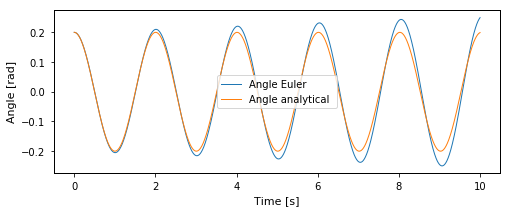

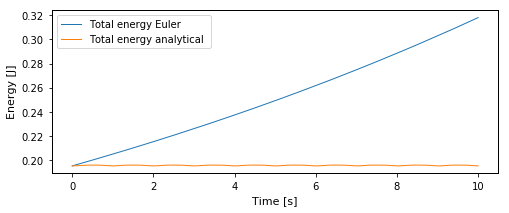

In [38]:
"""plot results"""
plt.plot(t_vec, theta_vec_euler, label = "Angle Euler")
plt.plot(t_vec, theta_vec_analy, label = "Angle analytical ")
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.legend()
plt.show()

plt.plot(t_vec, total_energy_euler, label = "Total energy Euler ")
plt.plot(t_vec, total_energy_analy, label = "Total energy analytical ")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.legend()
plt.show()


When the inital angle is to large the two methods differ. For the initial condition of $\theta_0 = 0.2$ rad it is sufficient to have a timestep of about 0.005 seconds. Still for all parameters the total energy of the computed solution and analytical solution differs a lot 


### 2. Add Euler-Cromer and Runge-Kutta (4th order) options for solving the differential equations.

In [39]:
'''Euler-Cromer method: '''
def euler_cromer_step(theta_vec, omg_vec, i, dt):
    omg_vec[i+1] = omg_vec[i] - (g/l)*np.sin(theta_vec[i])*dt
    theta_vec[i+1] = theta_vec[i] + omg_vec[i+1]*dt

    
    
def euler_cromer_solve(theta_vec, omg_vec, dt):
    for i in range(timesteps-1):
        euler_cromer_step(theta_vec, omg_vec, i, dt)

In [40]:
#New arrays for Euler-Cromer
omg_vec_cromer = np.zeros(timesteps)
theta_vec_cromer = np.zeros(timesteps)

# set initial values
omg_vec_cromer[0] = omg_0
theta_vec_cromer[0] = theta_0

euler_cromer_solve(theta_vec_cromer, omg_vec_cromer, dt)
kin_energy_cromer, pot_energy_cromer, total_energy_cromer = energies(theta_vec_cromer, omg_vec_cromer)

In [41]:
"""Runge-Kutta 4th order"""
# y = [thetea, omega]

def ddt_omg_theta(t, y):
    return [y[1], -(g/l)*np.sin(y[0])]

sol = solve_ivp(ddt_omg_theta, t_span=[0, sim_time], y0=[theta_0, omg_0], max_step = dt )
theta_vec_RK45, omg_vec_RK45 = sol.y[0], sol.y[1]
kin_energy_RK45, pot_energy_RK45, total_energy_RK45 = energies(sol.y[0], sol.y[1])


#### 2.1 
##### Task: 
*plot the angle and and total energy for all three methods as a function of time for several cycles. Use the same time step for all and choose it such that you can see a clear difference with respect to the Euler method. Take into account also computational efficiency aspects! There is no reason to use a very small time step if larger values perform alright.*

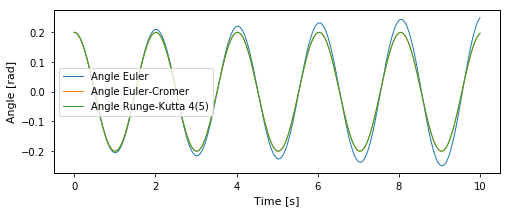

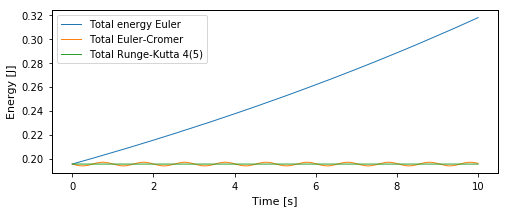

In [47]:

"""plot results"""
plt.plot(t_vec, theta_vec_euler, label = "Angle Euler")
plt.plot(t_vec, theta_vec_cromer, label = "Angle Euler-Cromer")
plt.plot(sol.t, theta_vec_RK45, label = "Angle Runge-Kutta 4(5)")
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.legend()
plt.show()

plt.plot(t_vec, total_energy_euler, label = "Total energy Euler ")
plt.plot(t_vec, total_energy_cromer, label = "Total Euler-Cromer ")
plt.plot(sol.t, total_energy_RK45, label = "Total Runge-Kutta 4(5)")

plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.legend()
plt.show()

We se that the Runge-Kutta method is the best. 

#### 2.2 
##### Task: 
*plot the trajectory in the phase space (i.e. select the angle and velocity as axes in a 2D coordinate system) for all three methods by using the time step above. Run the simulations for several cycles.*

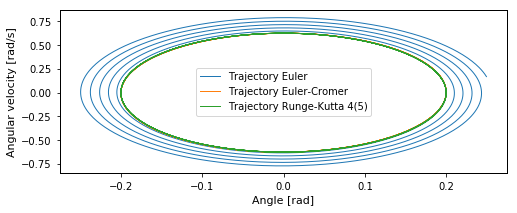

In [48]:
plt.plot(theta_vec_euler, omg_vec_euler, label = "Trajectory Euler")
plt.plot(theta_vec_cromer, omg_vec_cromer, label = "Trajectory Euler-Cromer")
plt.plot(theta_vec_RK45, omg_vec_RK45, label = "Trajectory Runge-Kutta 4(5)")
plt.xlabel("Angle [rad]")
plt.ylabel("Angular velocity [rad/s]")
plt.legend()
plt.show()



#### 2.3
##### Task: 
*Test the effect of varying time step for Euler-Cromer and RK4, respectively. What values lead to satisfactory results in your opinion?*

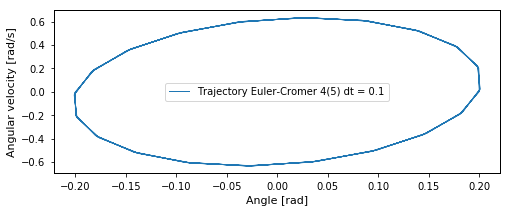

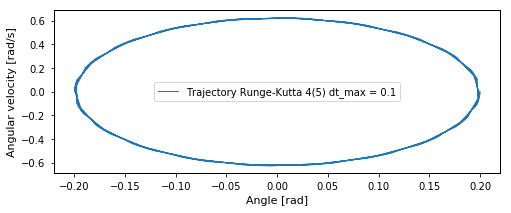

In [57]:
"""Euler-Cromer new dt"""
dt = 0.1
timesteps = int(sim_time/dt)


#New arrays for Euler-Cromer
omg_vec_cromer2 = np.zeros(timesteps)
theta_vec_cromer2 = np.zeros(timesteps)

# set initial values
omg_vec_cromer2[0] = omg_0
theta_vec_cromer2[0] = theta_0

euler_cromer_solve(theta_vec_cromer2, omg_vec_cromer2, dt)
kin_energy_cromer2, pot_energy_cromer2, total_energy_cromer2 = energies(theta_vec_cromer2, omg_vec_cromer2)

plt.plot(theta_vec_cromer2, omg_vec_cromer2, label = f"Trajectory Euler-Cromer 4(5) dt = {dt}")
plt.xlabel("Angle [rad]")
plt.ylabel("Angular velocity [rad/s]")
plt.legend()
plt.show()

"""Ruge kutta new dt"""
dt = 0.1

sol2 = solve_ivp(ddt_omg_theta, t_span=[0, sim_time], y0=[theta_0, omg_0], max_step = dt )
theta_vec_RK452, omg_vec_RK452 = sol2.y[0], sol2.y[1]
kin_energy_RK452, pot_energy_RK452, total_energy_RK452 = energies(sol2.y[0], sol2.y[1])

plt.plot(theta_vec_RK452, omg_vec_RK452, label = f"Trajectory Runge-Kutta 4(5) dt_max = {dt}")
plt.xlabel("Angle [rad]")
plt.ylabel("Angular velocity [rad/s]")
plt.legend()
plt.show()

By trying different values we find that a timestep of $dt ≤ 0.1$ leads to a resonable solutin for both methods.

In [55]:
'''Animation'''
# cartesian coordinates of the pendulum tip
x = np.sin(theta_vec_cromer)
y = -np.cos(theta_vec_cromer)

# Set up fig and stuff for the animated plot
fig = plt.figure(figsize=(2,2), dpi=60)
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
string, = ax.plot([], [], lw=2)
mass = plt.Circle((x[0], y[0]), 0.05, color='blue')


def init():
    string.set_data([],[])
    ax.add_artist(mass)
    return string,


def animate(i):
    mass.center = (x[i], y[i])
    string.set_data([0, x[i]], [0, y[i]])
    return string, mass


anim = FuncAnimation(fig, animate, init_func=init, frames=timesteps, interval=1000*dt, blit=True)
plt.close(anim._fig)
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available